# EDA on the popular battle royale game PUBG
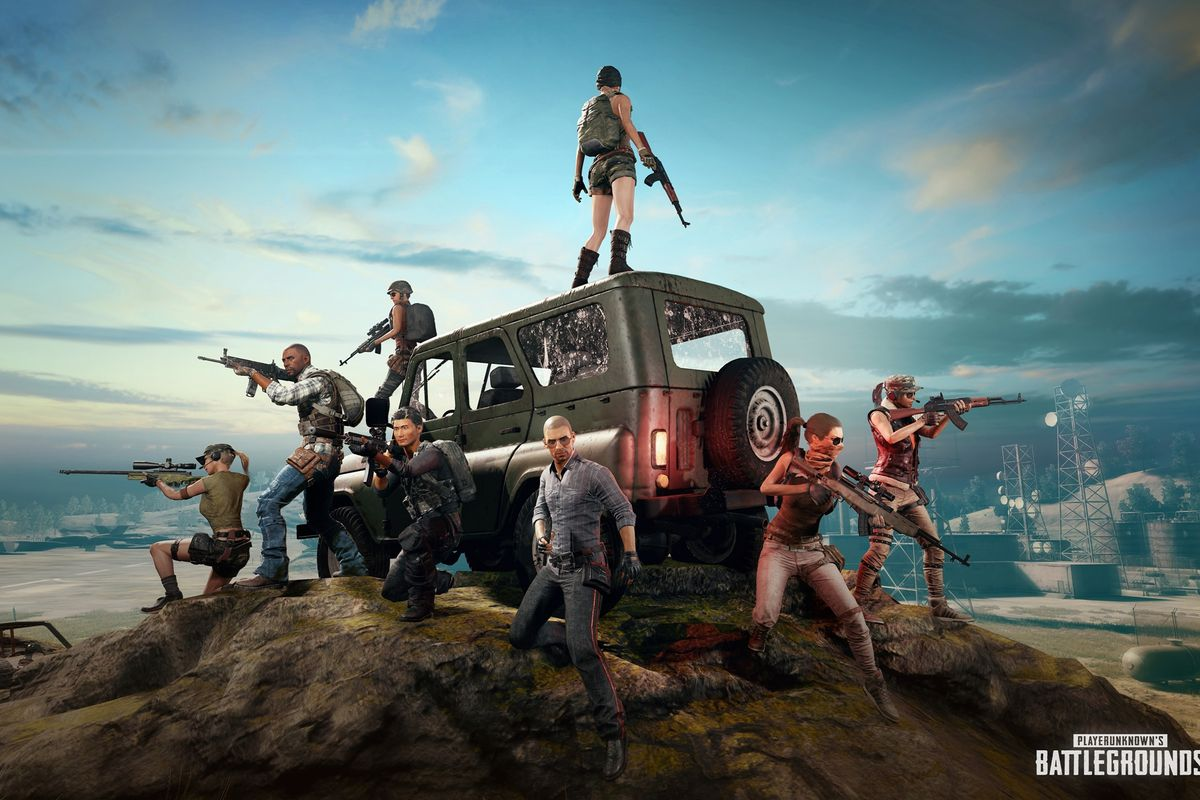

This notebook features:
- [Outlier Detection](#Outlier Detection)
- [Univariate Analysis](#Univariate-Analysis)
- [Multi Variate Analysis](#Multi-Variate-Analysis)
- [Final Conclusion](#Final-Conclusion)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

In [ ]:
pubg=pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/train_V2.csv')

In [ ]:
pubg.head()

In [ ]:
pubg.info()

Check for missing values

In [ ]:
pubg.isnull().sum()

In [ ]:
for i in pubg.columns[3:]:
    print("min of ",i,min(pubg[i]))
    print("max of ",i,max(pubg[i]))

In [ ]:
pubg['rankPoints'].value_counts()

**Test**

In [ ]:
pubg.info()

In [ ]:
pubg['matchType'].unique()

**QUALITY ISSUES **:
* **Missing value in winPlacePerc.**
* **column 'rankPoints' has a lot of None values represented by -1**

- **Dropping column 'rankPoints' as this ranking is inconsistent and is being deprecated in the API’s next version,**
- **Dropping the row containg the missiong value as this value can't be estimated**

In [ ]:
pubg.drop(columns={'rankPoints'},inplace=True)
pubg=pubg[~pubg['winPlacePerc'].isnull()]

**Test**

In [ ]:
pubg.isnull().sum()

- **Changing Column 'matchType' to Categorical**

In [ ]:
pubg['matchType']=pubg['matchType'].astype('category')


**Test**

In [ ]:
pubg.info()

# **Creating a new column named playersJoined to count the total number of players in a match**

In [ ]:
pubg['playersJoined'] = pubg.groupby('matchId')['matchId'].transform('count')
pubg

# **Filtering those matches that have nearly full with a 100 players for better analysation**

In [ ]:
pubg=pubg[pubg['playersJoined']>97]
pubg.shape

# Outlier Detection
**Some rows in our dataset have weird characteristics. The players could be cheaters, maniacs or just anomalies. Removing these outliers will likely improve results.**

* **Create feature totalDistance**

In [ ]:
pubg['totalDistance'] = pubg['rideDistance'] + pubg['walkDistance'] + pubg['swimDistance']

**Kills without movement**

In [ ]:
pubg[(pubg['kills'] > 0) & (pubg['totalDistance'] == 0)].shape[0]

* **This is probably the most obvious sign of cheating in the game. It is possible that the player has somehow gone offline and can't move, but the player could have got killed. However, if the player managed to get kills without moving it is most likely a cheater.**
* **Let's drop these rows for a better analysis**

In [ ]:
pubg=pubg[~((pubg['kills'] > 0) & (pubg['totalDistance'] == 0))]
pubg.shape

# **Let's divide the dataset into two datasets containing the players with the winning chance of 0.99 or above and players with the winning change of 0.1 or below to better understand thier playing style and strategies**

In [ ]:
pubg_win=pubg[pubg['winPlacePerc']>0.96]
pubg_win.shape

In [ ]:
pubg_lose=pubg[pubg['winPlacePerc']<0.4]
pubg_lose.shape

# **Univariate Analysis**

* **Assists**

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['assists'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['assists'])
plt.show()

**Conclusion**
* **Players who win more generally assists more than palyers who lose**

* **Boosts**

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['boosts'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['boosts'])
plt.show()

**Conclusion**
* **using 2-5 boosts is the most common among winning players**
* **Using no boosts at all may be a cause of loosing**

* **Damage Dealt**

In [ ]:
plt.subplots(figsize=(20,10))
sns.distplot(pubg_win['damageDealt'],label="Losing Players")
sns.distplot(pubg_lose['damageDealt'],label="Losing Players")
plt.legend(["Players with win chance of 97% and above","Players with win chance of 3% and below"])
plt.show()

**Conclusion**
* **Players with an average damage of 500 or above win**
* **Players with an average damage of 50 or below lose**

**Knock downs**

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['DBNOs'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['DBNOs'])
plt.show()

**Conclusion**
* **Winning Players' knockdown varies to a greater extent**

**Headshot Kills**

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['headshotKills'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['headshotKills'])
plt.show()

**Conclusion**
* **Players who lose hardly takes more than 1 headshot**
*

**Headshot Kills**

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['heals'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['heals'])

**Conclusion**
* **Players who lose hardly heals themselves **
*

**Kill Place**

In [ ]:
plt.subplots(figsize=(20,10))
sns.distplot(pubg_win['killPlace'])
sns.distplot(pubg_lose['killPlace'])
plt.legend(["Players with win chance of 97% and above","Players with win chance of 3% and below"])
plt.show()

**Conclusion**
* **This is obvious that winning players have ranks close to 1 **
* **This is obvious that losing players have ranks close to 100 **
* **Both graphs show 3 humps in descending and ascending order respectively, which may signify periods during a match where the action intensifies and the players die the most**
* **Inexperienced players mostly die at the begining and only few make it to the top 20s**
* **Experienced players mostly die at the end as most of them make it to the top 10s**

**Kills**

In [ ]:
plt.subplots(figsize=(20,10))
sns.distplot(pubg_win['kills'])
sns.distplot(pubg_lose['kills'])
plt.legend(["Players with win chance of 97% and above","Players with win chance of 3% and below"])
plt.show()

**Conclusion**
* **Players who lose, kills 1 enemy in maximun number of matches**
* **Players who win, kill 4 or more enemies in maximun number of matches**

**kill Streaks **

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['killStreaks'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['killStreaks'])

**Conclusion**
* **Winstreak of winning palyers lie between 1-2**
* **Winstreak of losing palyers lie between 0-1**


**Longest Kill**

In [ ]:
plt.subplots(figsize=(20,10))
sns.distplot(pubg_win['longestKill'])
sns.distplot(pubg_lose['longestKill'])
plt.legend(["Players with win chance of 97% and above","Players with win chance of 3% and below"])
plt.show()

**Conclusion**
* **This may hint that using snipers can be a usefull strategy of winning**


**Match Type**

In [ ]:
plt.subplots(figsize=(40,30))
plt.subplot(2, 1, 1)
plt.title("Players with win chance of 97% and above")
sns.countplot(x=pubg_win['matchType'],order=pubg_win['matchType'].value_counts().index)
print("")
plt.subplot(2, 1, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(x=pubg_lose['matchType'],order=pubg_lose['matchType'].value_counts().index)
plt.show()

**Conclusion**
* **In both the cases the most played match type is sqad-fpp**
* **Squad and duo-fpp as the close 2nd and 3rd with inter changed position in the two graphs**
* **Playing in match type normal sqad or solo and be easier as number of experienced and skilled player is less**


**Revives**

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['revives'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['revives'])
plt.show()

**Conclusion**
* **This is also very obvious that reviving team mates more world increase the chance of winning**



**Total distance travelled**

In [ ]:
plt.subplots(figsize=(20,10))

sns.distplot(pubg_win['totalDistance'])
plt.title("Players with win chance of 99% and above")

plt.title("Players with win chance of 1% and below")
sns.distplot(pubg_lose['totalDistance'])
plt.show()

**Conclusion**
* **Sticking to a place or camping in the same place may be major cause of being killed**



**Now lets see which mode of transport gives the higest chance of winning**

In [ ]:
plt.subplots(figsize=(30,20))
sns.distplot(pubg_win['walkDistance'],label="walkDistance_win", kde=False)
sns.distplot(pubg_win['rideDistance'],label="rideDistance_lose", kde=False)
sns.distplot(pubg_win['swimDistance'],label="swimDistance_win", kde=False)
plt.legend()
plt.show()

**Conclusion**
* **Walking is the most common method of travelling, as the player can quickly act to his surroundings**
* **Riding in a is the second most common method of travelling, as some one can blow up your vehicle**
* **Walking is the least common method of travelling, as it leaves the player totally vulnerable**



**Road kills**

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['roadKills'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['roadKills'])
plt.show()

**Conclusion**
* **Riding a vehicle reduces the chance of killing enemy players for both experienced and in-experienced players**

**Vehicle Destroyed**

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['vehicleDestroys'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['vehicleDestroys'])
plt.show()

**Conclusion**
* **Both experienced and in-experienced players barely destroy one vehicle per match**

**Team kills**

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.countplot(pubg_win['teamKills'])
plt.title("Players with win chance of 97% and above")
plt.subplot(1, 2, 2)
plt.title("Players with win chance of 3% and below")
sns.countplot(pubg_lose['teamKills'])
plt.show()

**Conclusion**
* **This is also very obvious as no one would intentionally kill their team mate**

# **Multi Variate Analysis**

* # **Correlation between each column**

In [ ]:
plt.subplots(figsize=(20, 20))
sns.heatmap(pubg.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

* **Let's zoom to the top-5 most positive correlated variables with the target column 'winPlacePerc'.**

In [ ]:
plt.subplots(figsize=(15, 15))
cols=pubg.corr().nlargest(6, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(pubg[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#  **Let's explore these columns in more details**

**Does walking more means a greater chance of winning ?**

In [ ]:
sns.relplot(x='walkDistance',y='winPlacePerc',kind='scatter',data=pubg,height=8)
plt.grid()
plt.show()

**Conclusion**
* **Walking a distance of about 10000 correlates to a 80% chance of winning**

**Does covering more distance means a greater chance of winning ?**

In [ ]:
sns.relplot(x='totalDistance',y='winPlacePerc',kind='scatter',data=pubg,height=8)
plt.grid()
plt.show()

**Conclusion**
* **Covering a distance of about 10000 correlates to a 80% chance of winning**

**Does using more boosts give a greater chance of winning ?**

In [ ]:
plt.subplots(figsize=(15, 15))
sns.pointplot(x='boosts',y='winPlacePerc',data=pubg,height=8)
plt.grid()
plt.show()

**Conclusion**
* **As players near the end of a match they use all the boosts available to their benefit**

**Does using more boosts give a greater chance of winning ?**

In [ ]:

plt.subplots(figsize=(15, 15))
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=pubg,height=8)
plt.grid()
plt.show()

**Conclusion**
* **This may suggest that if changing weapons more often can lead to winning, but picking more than 10-15 does not futher increase chances **

**Does more kills mean a greater chance of winning ?**

In [ ]:
plt.subplots(figsize=(15, 15))
sns.pointplot(x='kills',y='winPlacePerc',data=pubg,height=8)
plt.grid()
plt.show()

**Conclusion**
* **Kills have major impact on winning chances**
* **Kills of above 14 ensure 95% and above chances of winning**

**Does more knockouts mean a greater chance of winning ?**

In [ ]:
plt.subplots(figsize=(15, 15))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=pubg,height=8)
plt.grid()
plt.show()

**Conclusion**
* **This has a slightly less positive correlation with winning chance than kills, thus it is better to kill off your enemy rather than just knocking them down**

**Does assisting more mean a greater chance of winning ?**

In [ ]:
plt.subplots(figsize=(15, 15))
sns.pointplot(x='assists',y='winPlacePerc',data=pubg,height=8)
plt.grid()
plt.show()

**Conclusion**
* **Assists of atleast 6 or more give a significant chance of winnning**

**Does healing more mean a greater chance of winning ?**

In [ ]:
plt.subplots(figsize=(15, 15))
sns.pointplot(x='heals',y='winPlacePerc',data=pubg,height=8)
plt.grid()
plt.show()

**Conclusion**
* **Healing as much as possible has the higest chance of winning**

**Does reviving your team mates more mean a greater chance of winning ?**

In [ ]:
plt.subplots(figsize=(15, 15))
sns.pointplot(x='revives',y='winPlacePerc',data=pubg,height=8)
plt.grid()
plt.show()

**Conclusion**
* **Revivng your team mates gives a higher chance of winning, but upto an average of 7 times after which the more revives does not increase chances of winning that much**

## **Final Conclusion**
PlayerUnknown's Battlegrounds (PUBG) is an online multiplayer battle royale game developed and published by PUBG Corporation, a subsidiary of South Korean video game company Bluehole. The game is based on previous mods that were created by Brendan "PlayerUnknown" Greene for other games, inspired by the 2000 Japanese film Battle Royale, and expanded into a standalone game under Greene's creative direction. In the game, up to one hundred players parachute onto an island and scavenge for weapons and equipment to kill others while avoiding getting killed themselves. The available safe area of the game's map decreases in size over time, directing surviving players into tighter areas to force encounters. The last player or team standing wins the round.
In this notebook, I've tried to find out some of the major strategies and play-styles that brings the Chicken Dinner home.

**What not to do in PUBG ?**
* Don't stay in a place from the beginning, keep changinging locations. This ensures that you are hard to locate even you get spotted once.
* Destroying vehicles does not have a siginificant impact on winning chances, so don't waste bullets unnecessarily.
* swim as less as possible as this leaves the player totally vulnerable.
* Don't forget to heal, as players who don't heal even once has a huge chance of losing.
* Don't leave your enemy just knocked out as they are likely to get rivived by their teammates.

**What to do in PUBG ?**
* Always carry 2-5 boosts, and 10-15 heals during the entire match.
* At the end of the match use as much boosts as possible to maximise your chance of winning.
* Try to up your assists and damagedealt even if you can get kills, this a major impact on winning chances.
* Revive your team mates, but first heal yourself because while reviving  you can get gunned down leaveing you and your team mate both dead.
* Use snipers whenever possible. If used correctly can greatly increse chances of winning as you can get a kill well before being spotted.
* Walk the distance, if possible, instead of driving or swimming as you can react more quickly to your surroundings.
* Try to get in less popular match types like duo or normal-sqad as you are less likely to run into the Pros. This may also reduce the fun, so find your ideal match type.


**Thank you for staying till now! This is my first kernel ever. An upvote would be really appreciated and help me keep going!**